# Group Work Project #1
Names: Alfonso, Scholastica, Nwosu Stephen

In [ ]:
pip install fredapi

**Initialize python packages and tools for Exploratory Analysis**

In [ ]:
from fredapi import Fred
import pandas as pd

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Financing Scenarios

* Money at a fixed rate for an unsecured purchase
* Money at a floating rate for a secured purchase
* Money at a fixed rate for a business for a construction loan
* Publicly traded equity
* Publicly traded bond
* An illiquid security

### Money at a fixed rate for an unsecured purchase

In [ ]:
fred = Fred(api_key='312fc3be27db43a836ff04bc5fce7453')

# Borrower Default Risk

delinquency_data = fred.get_series('DRCCLACBS')
delinquency_df = pd.DataFrame(delinquency_data, columns=['Delinquency Rate'])

delinquency_df.describe()

,Delinquency Rate
count,134.000000
mean,3.725896
std,1.204748
min,1.540000
25%,2.535000
50%,3.930000
75%,4.687500
max,6.770000


In [ ]:
# Interest Rate Data

interest_rate_data = fred.get_series('TERMCBCCALLNS')
interest_rate_df = pd.DataFrame(interest_rate_data, columns=['Interest Rate'])
interest_rate_df.dropna(inplace=True)
interest_rate_df.describe()

,Interest Rate
count,119.000000
mean,14.184958
std,2.177963
min,11.820000
25%,12.475000
50%,13.600000
75%,15.415000
max,21.590000


In [ ]:
# Macroeconomic Data

unemployment_data = fred.get_series('UNRATE')
unemployment_df = pd.DataFrame(unemployment_data, columns=['Unemployment Rate'])

unemployment_df.describe()

,Unemployment Rate
count,920.000000
mean,5.689783
std,1.709897
min,2.500000
25%,4.400000
50%,5.500000
75%,6.700000
max,14.800000


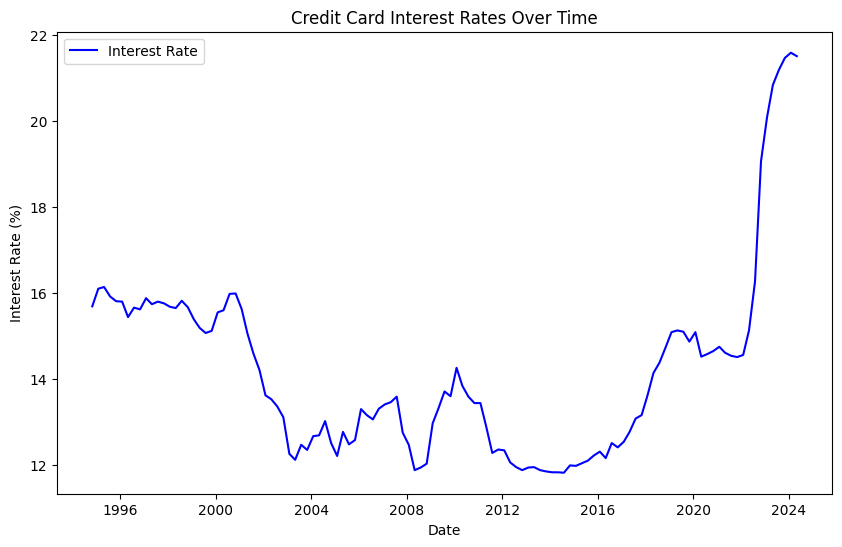

In [ ]:
# Exploratory Analysis

plt.figure(figsize=(10, 6))
plt.plot(interest_rate_df.index, interest_rate_df['Interest Rate'], label='Interest Rate', color='blue')
plt.title('Credit Card Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()


The line plot shows an increase in interest rates over time indicating an increased risk of default by a borrower.

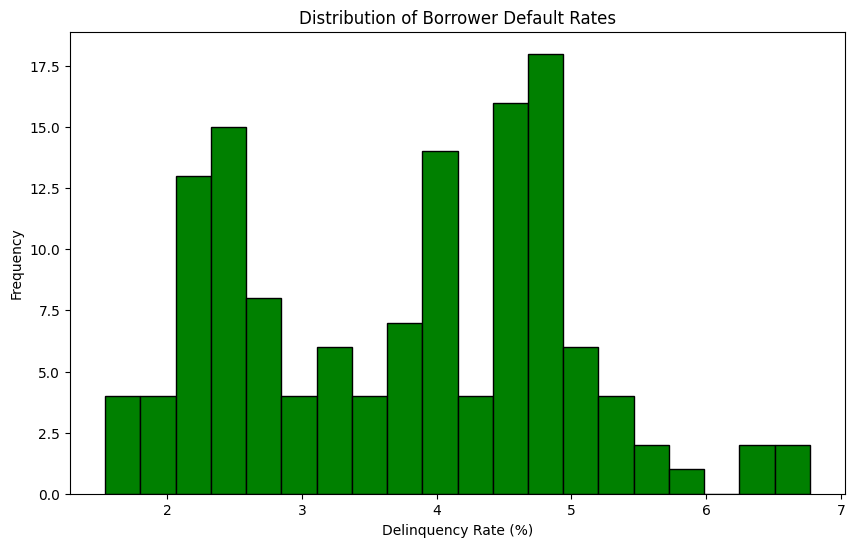

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(delinquency_df['Delinquency Rate'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Borrower Default Rates')
plt.xlabel('Delinquency Rate (%)')
plt.ylabel('Frequency')
plt.show()

Delinquency rates show a right-side skewed distribution of defaults indicating how macroeconomic factors are tied to the frequency of borrower defaults at times of economic distress.

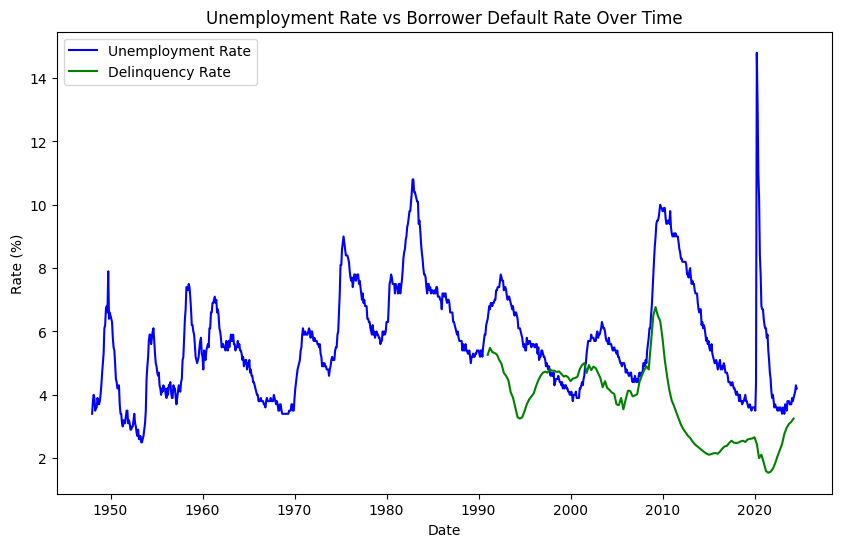

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(unemployment_df.index, unemployment_df['Unemployment Rate'], label='Unemployment Rate', color='blue')
plt.plot(delinquency_df.index, delinquency_df['Delinquency Rate'], label='Delinquency Rate', color='green')
plt.title('Unemployment Rate vs Borrower Default Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()


Periods of high default are correlated with an increase in unemployment rate.

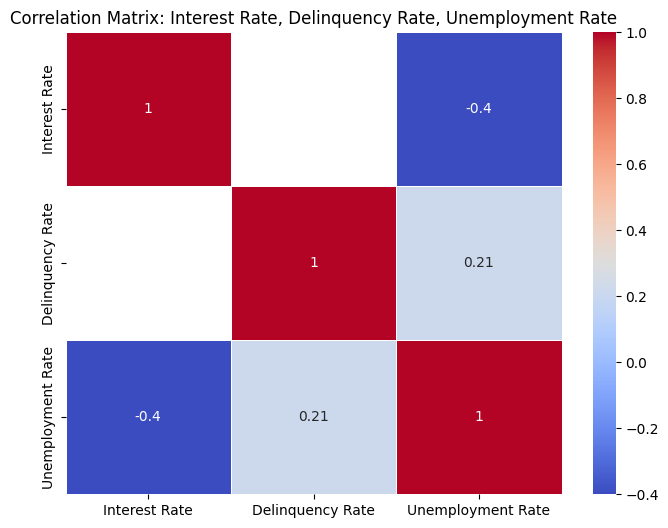

In [ ]:
combined_df = pd.concat([interest_rate_df, delinquency_df, unemployment_df], axis=1)

# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Interest Rate, Delinquency Rate, Unemployment Rate')
plt.show()


Correlation matrix of factors with a strong correlation between unemployment rates and default.

### Money at a floating rate for a secured purchase

Data has been sourced from FRED API, the interest rates, Home price index and Default rates

In [ ]:
from fredapi import Fred
import pandas as pd

# Initialize FRED API with your API key (replace 'YOUR_API_KEY' with your actual key)
fred = Fred(api_key='bdfb2ffb9f9d4b9c8dfda3a5bd6550d0')
start = datetime.date.today() - datetime.timedelta(days=5*365)
end = datetime.date.today()
# Downloading historical interest rates (e.g., 1-Year LIBOR)
interest_rates = fred.get_series('IR14200', start, end)

# Downloading Home Price Index
home_price_index = fred.get_series('CSUSHPINSA', start, end)

# Downloading Mortgage Delinquency Rates
delinquency_rates = fred.get_series('MORTGAGE15US', start, end)

# Converting to DataFrames for easier manipulation
interest_rates_df = pd.DataFrame(interest_rates, columns=['Interest Rate'])
home_price_index_df = pd.DataFrame(home_price_index, columns=['Home Price Index'])
delinquency_rates_df = pd.DataFrame(delinquency_rates, columns=['Delinquency Rate'])

# Display the first few rows of each dataset
print(interest_rates_df.head())
print(home_price_index_df.head())
print(delinquency_rates_df.head())

            Interest Rate
2019-09-01          125.6
2019-10-01          123.5
2019-11-01          126.5
2019-12-01          125.2
2020-01-01          124.9
            Home Price Index
2019-09-01           211.865
2019-10-01           211.958
2019-11-01           212.096
2019-12-01           212.229
2020-01-01           212.391
            Delinquency Rate
2019-10-03              3.14
2019-10-10              3.05
2019-10-17              3.15
2019-10-24              3.18
2019-10-31              3.19


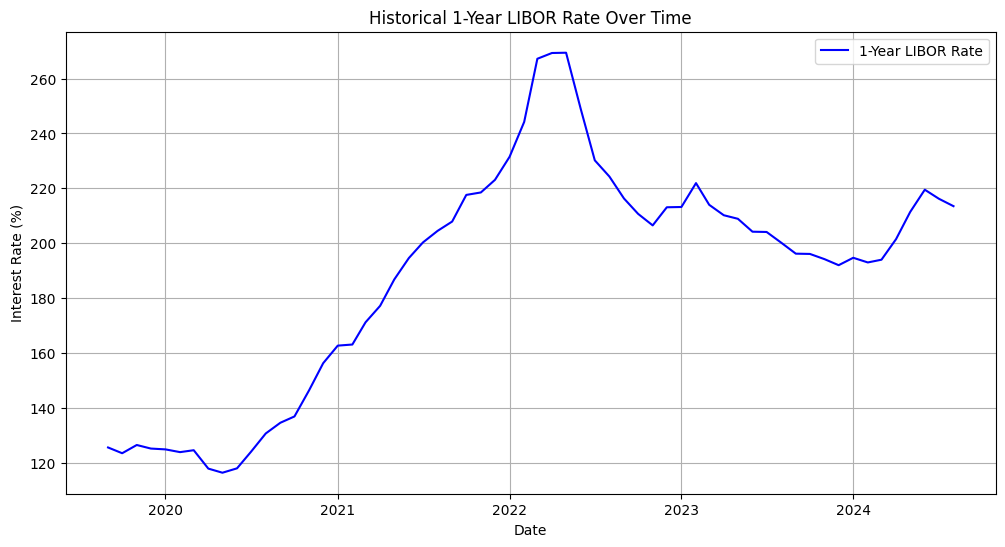

In [ ]:

# Time series plot for Interest Rates
plt.figure(figsize=(12, 6))
plt.plot(interest_rates_df.index, interest_rates_df['Interest Rate'], label='1-Year LIBOR Rate', color='blue')
plt.title('Historical 1-Year LIBOR Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid()
plt.show()

The above plot shows how the 1-Year LIBOR rate has fluctuated over time but in 2020 it was very low probably due to covid 19. The graph indicates that increased borrowing costs  could have impacted floating-rate loans.

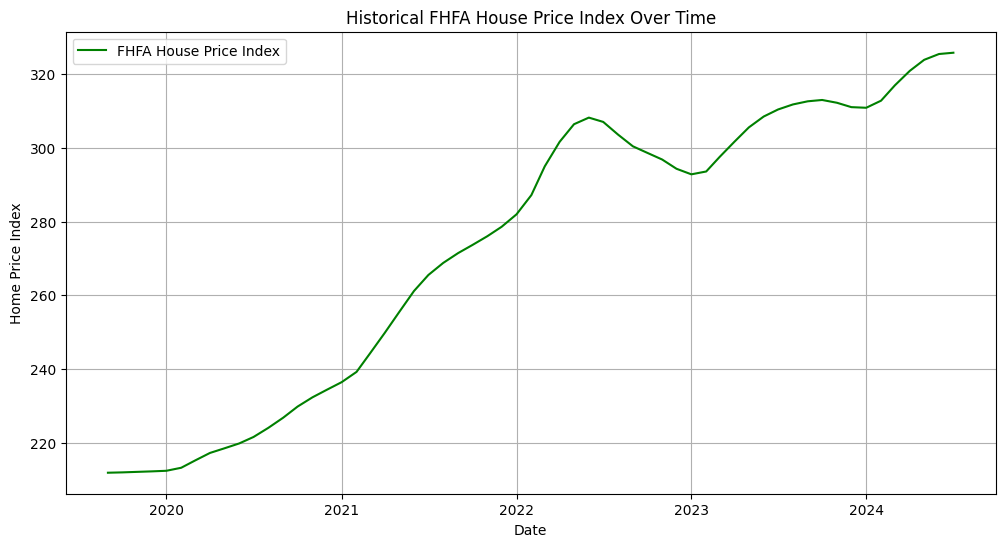

In [ ]:
# Time series plot for Home Price Index
plt.figure(figsize=(12, 6))
plt.plot(home_price_index_df.index, home_price_index_df['Home Price Index'], label='FHFA House Price Index', color='green')
plt.title('Historical FHFA House Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.grid()
plt.show()

The plot shows trends in housing prices over time, which are crucial for assessing collateral value in secured loans.

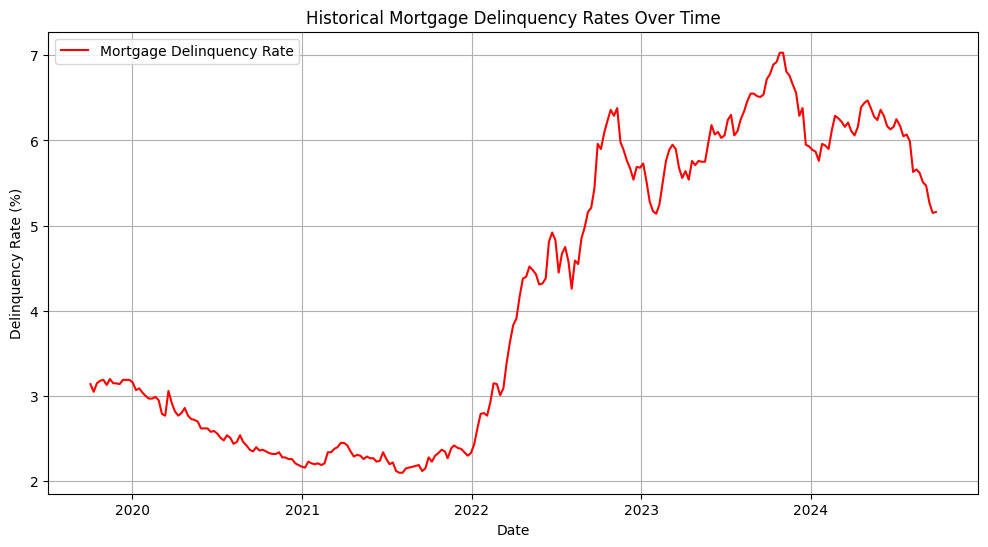

In [ ]:
# Time series plot for Mortgage Delinquency Rates
plt.figure(figsize=(12, 6))
plt.plot(delinquency_rates_df.index, delinquency_rates_df['Delinquency Rate'], label='Mortgage Delinquency Rate', color='red')
plt.title('Historical Mortgage Delinquency Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency Rate (%)')
plt.legend()
plt.grid()
plt.show()

The plot shows trends in housing prices over time, which are crucial for assessing collateral value in secured loans.

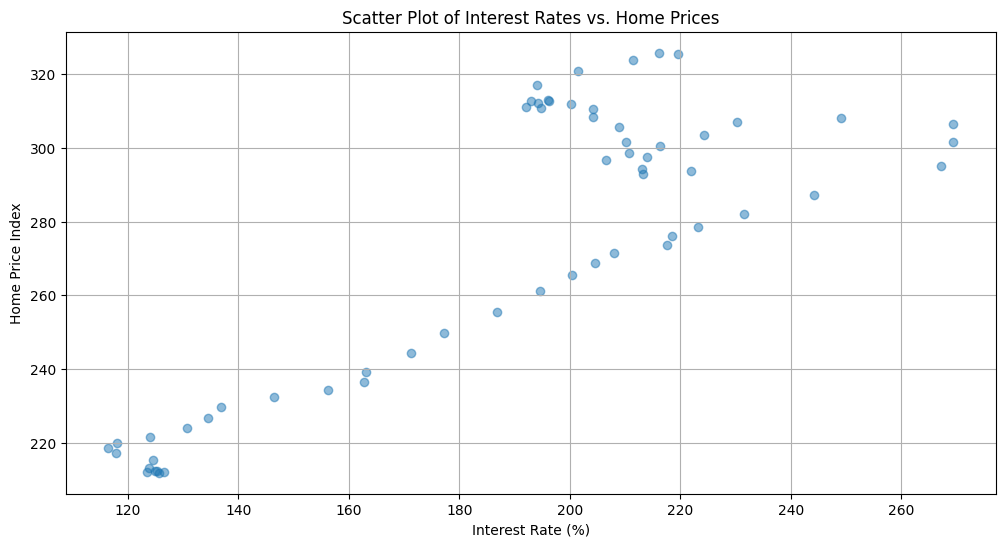

In [ ]:
# Merging datasets for correlation analysis
merged_data = pd.merge(interest_rates_df, home_price_index_df, left_index=True, right_index=True)

plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Interest Rate'], merged_data['Home Price Index'], alpha=0.5)
plt.title('Scatter Plot of Interest Rates vs. Home Prices')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Home Price Index')
plt.grid()
plt.show()

The scatter plot shows the relationship between interest rates and home prices. It helps shows that both are correlated hence may affect lending decisions.

### Money at a fixed rate for a business for a construction loan

Real Estate Loans: Commercial Real Estate Loans: Construction and Land Development Loans, All Commercial Banks (CLDACBW027SBOG)

In [ ]:
#Real Estate Loans: Commercial Real Estate Loans: Construction and Land Development Loans, All Commercial Banks (CLDACBW027SBOG)
import pandas_datareader as pdr
from datetime import datetime

start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 9, 11)

EstateLoan_data = pdr.get_data_fred('CLDACBW027SBOG', start_date, end_date)

print(EstateLoan_data.head())

            CLDACBW027SBOG
DATE                      
2015-01-07        223.6465
2015-01-14        224.3877
2015-01-21        225.2715
2015-01-28        226.1370
2015-02-04        226.9787


In [ ]:
EstateLoan_data.describe()

,CLDACBW027SBOG
count,506.000000
mean,361.070033
std,72.512380
min,223.646500
25%,311.294350
50%,350.129000
75%,402.781850
max,491.036300


Balance Sheet: Total Assets: Loans Secured by Real Estate: Construction and Development (QBPBSTASLNREALCONDEV)

In [ ]:
#Balance Sheet: Total Assets: Loans Secured by Real Estate: Construction and Development (QBPBSTASLNREALCONDEV)
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 9, 11)

TotalAsset_data = pdr.get_data_fred('QBPBSTASLNREALCONDEV', start_date, end_date)

TotalAsset_data.describe()

,QBPBSTASLNREALCONDEV
count,37.000000
mean,370341.075027
std,70207.733569
min,246246.534000
25%,324139.777000
50%,360044.668000
75%,402131.041000
max,500172.216000


Loan Performance: Total Loans and Leases: Noncurrent Rate (QBPLNTLNNCUR)

In [ ]:
#Loan Performance: Total Loans and Leases: Noncurrent Rate (QBPLNTLNNCUR)

start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 9, 11)

LoanPerformance_data = pdr.get_data_fred('QBPLNTLNNCUR', start_date, end_date)

LoanPerformance_data.describe()

,QBPLNTLNNCUR
count,37.000000
mean,1.109899
std,0.297770
min,0.719566
25%,0.907123
50%,1.018759
75%,1.231951
max,1.829311


In [ ]:
#Interest Rates and Price Indexes; Commercial Real Estate Price Index, Level (BOGZ1FL075035503Q)

start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 9, 11)

interest_rate_data = pdr.get_data_fred('BOGZ1FL075035503Q', start_date, end_date)

interest_rate_data.describe()

,BOGZ1FL075035503Q
count,38.000000
mean,292912.368421
std,36381.353742
min,238421.000000
25%,267200.750000
50%,291757.000000
75%,316495.750000
max,353109.000000


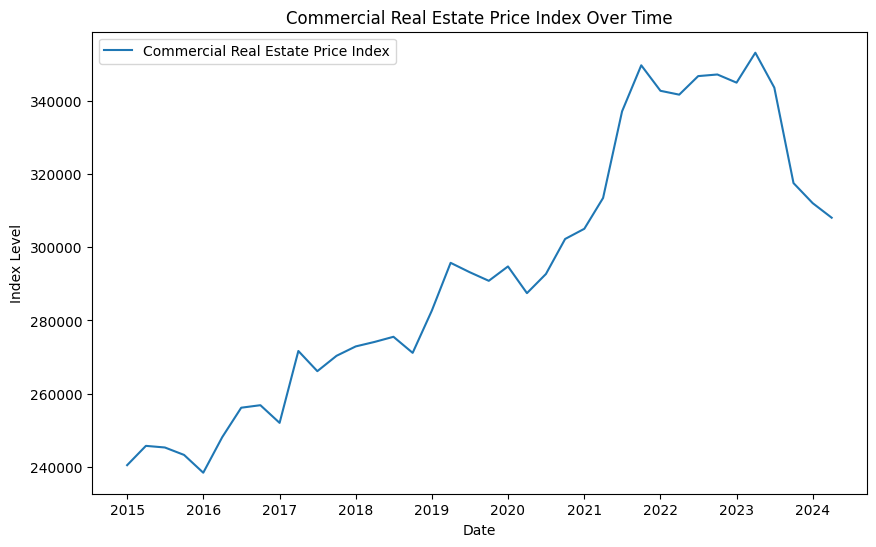

In [ ]:
#Exploratory Analysis

plt.figure(figsize=(10, 6))
plt.plot(interest_rate_data, label='Commercial Real Estate Price Index')
plt.title('Commercial Real Estate Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.show()

 A time series plot of Interest Price Indexes over time showing a decline post covid-19

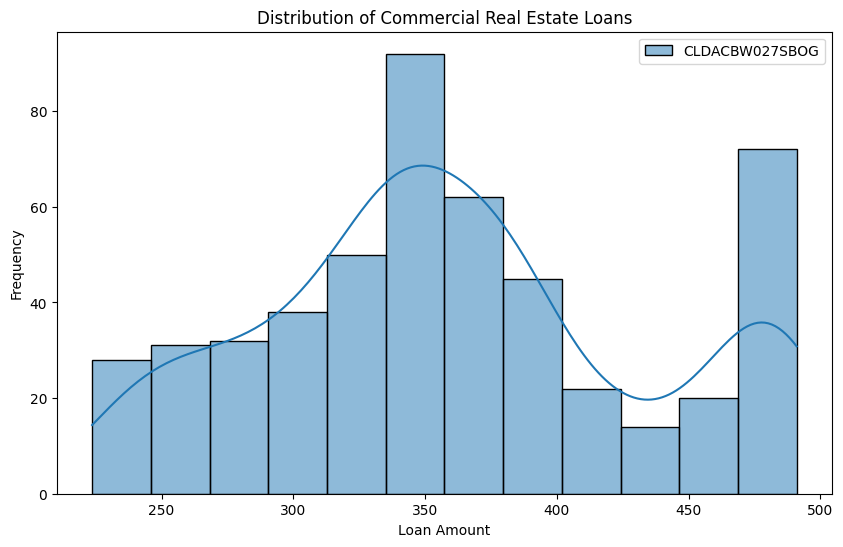

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(EstateLoan_data, kde=True)
plt.title('Distribution of Commercial Real Estate Loans')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Distribution of Real Estate Loans shows a skew to the left

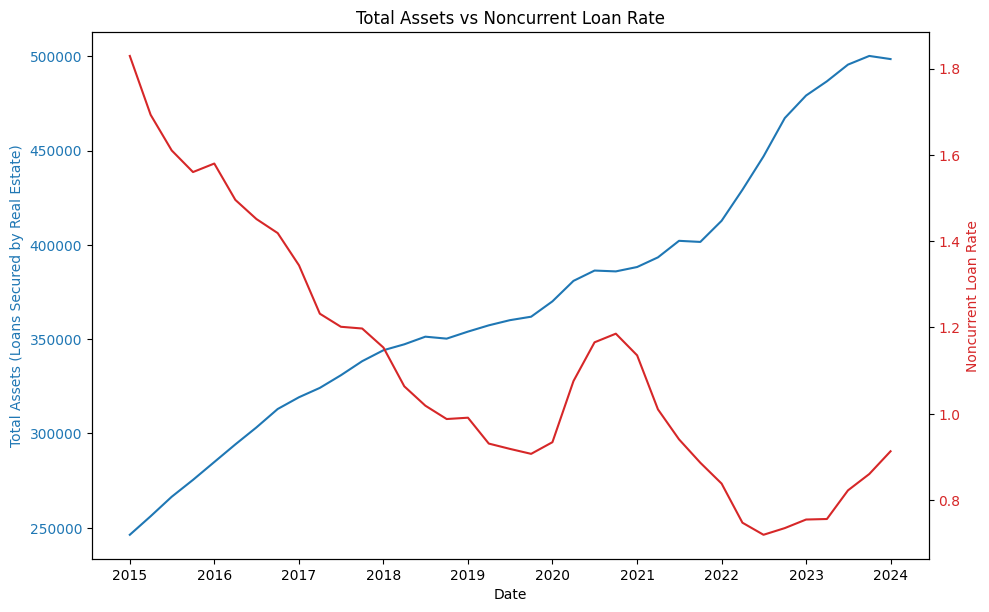

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Assets (Loans Secured by Real Estate)', color='tab:blue')
ax1.plot(TotalAsset_data, color='tab:blue', label='Total Assets')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Noncurrent Loan Rate', color='tab:red')
ax2.plot(LoanPerformance_data, color='tab:red', label='Noncurrent Loan Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Total Assets vs Noncurrent Loan Rate')
plt.show()

The Total Assets vs Noncurrent Loan Rate chart reflects an interplay between asset growth and loan performance. While the increase in total assets is a positive sign for the real estate market, the recent rise in the noncurrent loan rate indicate emerging risks that could affect future lending.

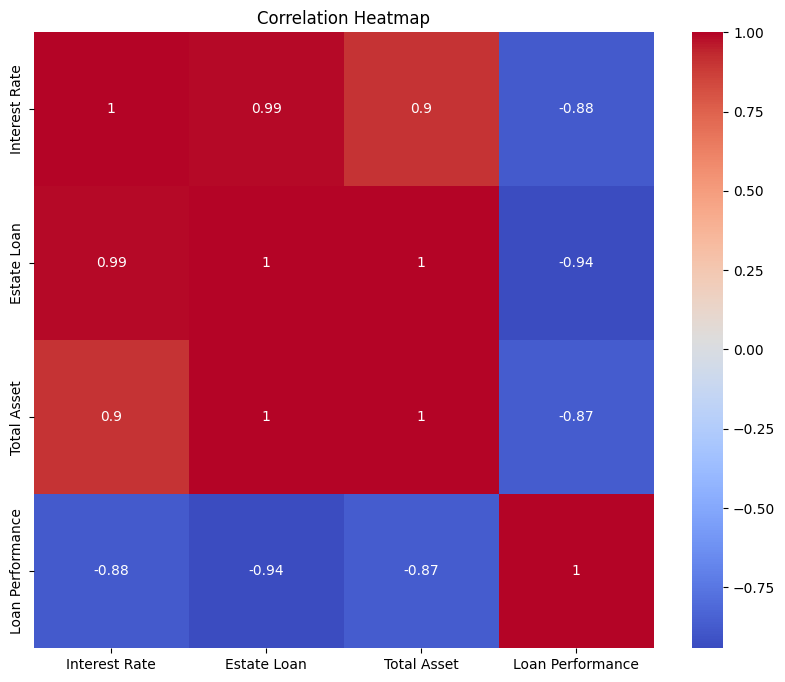

In [ ]:
#Correlation Heatmap
combined_data = pd.concat([interest_rate_data, EstateLoan_data, TotalAsset_data, LoanPerformance_data], axis=1)
combined_data.columns = ['Interest Rate', 'Estate Loan', 'Total Asset', 'Loan Performance']

plt.figure(figsize=(10, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap indicates a strong positive correlation between Interest Rate and Estate Loan, while Loan Performance shows a strong negative correlation with both Interest Rate and Estate Loan.


### Publicly traded equity

In [ ]:
# Stock Price Volatility Data

stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Daily Returns'].dropna(inplace=True)

stock_data['Volatility'] = stock_data['Daily Returns'].rolling(window=21).std() * np.sqrt(252)


volatility_df = pd.DataFrame(stock_data['Volatility'], columns=['Volatility'])
volatility_df.dropna(inplace=True)

volatility_df.describe()

[*********************100%***********************]  1 of 1 completed


,Volatility
count,735.000000
mean,0.339699
std,0.155490
min,0.147290
25%,0.240496
50%,0.313505
75%,0.397326
max,1.066534


In [ ]:
# Market Correlation Factors Data

stocks = ['AAPL', 'MSFT', 'GOOG']
stock_data_multi = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns for each stock
stock_returns = stock_data_multi.pct_change()

# Compute correlation matrix
correlation_matrix = stock_returns.corr()

# Display correlation matrix
print(correlation_matrix)

[*********************100%***********************]  3 of 3 completed

Ticker      AAPL      GOOG      MSFT
Ticker                              
AAPL    1.000000  0.727658  0.811363
GOOG    0.727658  1.000000  0.825172
MSFT    0.811363  0.825172  1.000000


In [ ]:
# Market Liquidity Data

# Calculate average trading volume over time for historical trading volume for AAPL
stock_data['Avg Volume'] = stock_data['Volume'].rolling(window=21).mean()

# Create DataFrame for liquidity (average trading volume)
liquidity_df = pd.DataFrame(stock_data['Avg Volume'], columns=['Avg Volume'])

liquidity_df.describe()

,Avg Volume
count,7.360000e+02
mean,1.122152e+08
std,4.399095e+07
min,6.401630e+07
25%,8.348205e+07
50%,9.767945e+07
75%,1.282583e+08
max,3.075235e+08


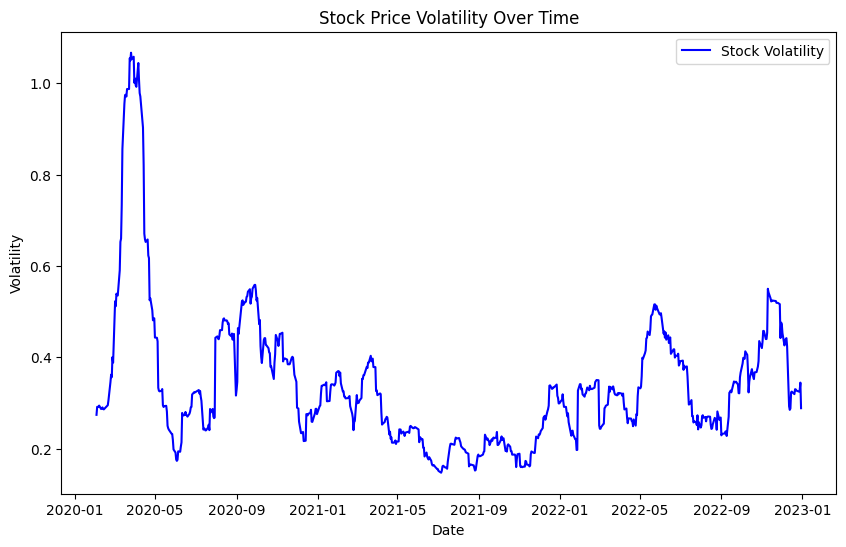

In [ ]:
# Exploratory Analysis

plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Spikes in price volatility suggest market events or instability at these times meaning higher market uncertainty

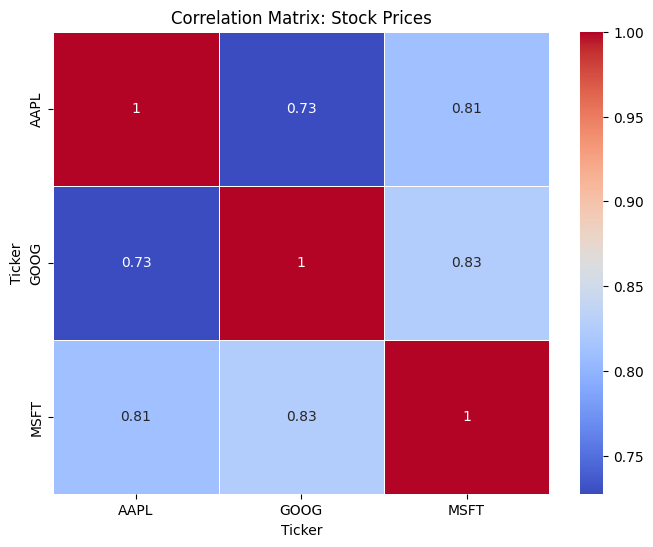

In [ ]:
correlation_matrix = stock_returns.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Stock Prices')
plt.show()

Heatmap showing strong correlation among these tech stocks indicating that they tend to move closely together.

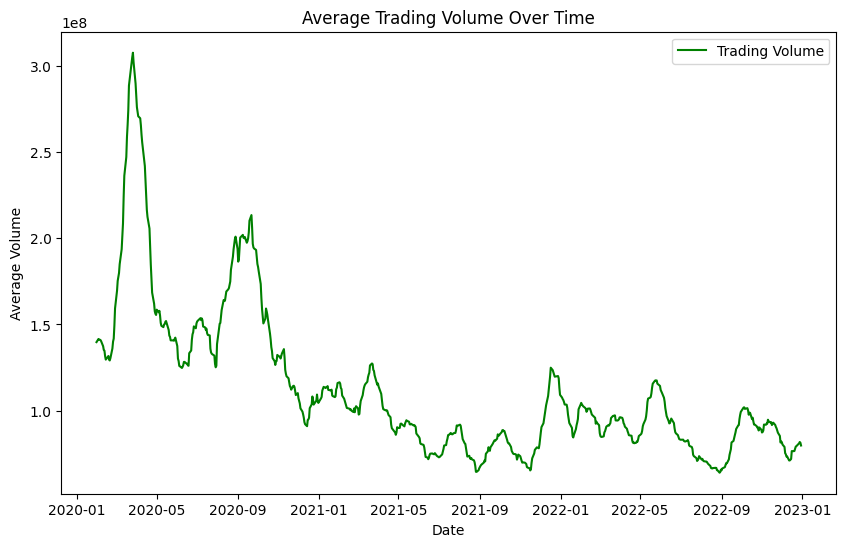

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Avg Volume'], label='Trading Volume', color='green')
plt.title('Average Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.legend()
plt.show()

Higher trading volumes indicate higher market liquidity, reflecting increased market activity.

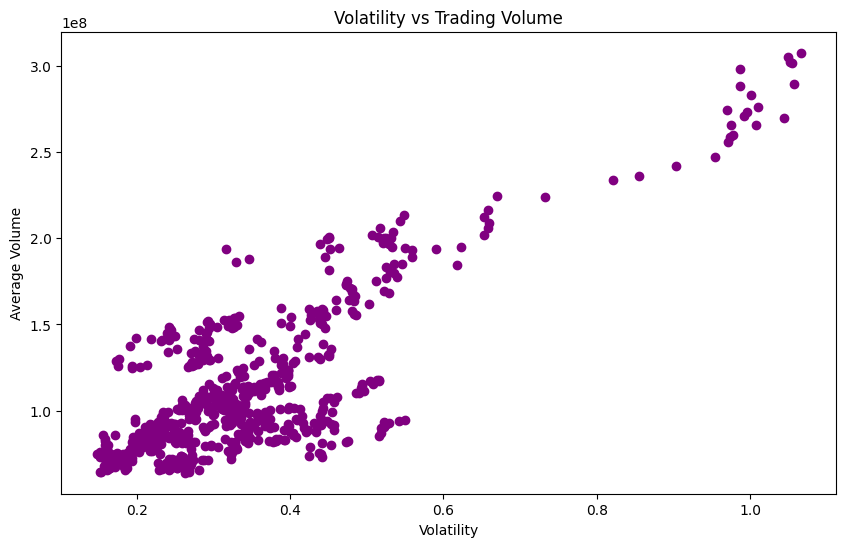

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volatility'], stock_data['Avg Volume'], color='purple')
plt.title('Volatility vs Trading Volume')
plt.xlabel('Volatility')
plt.ylabel('Average Volume')
plt.show()

Scatter plot shows a positive relationship between higher volatility and average trading volume, indicating increased investor activity due to higher market uncertainty.

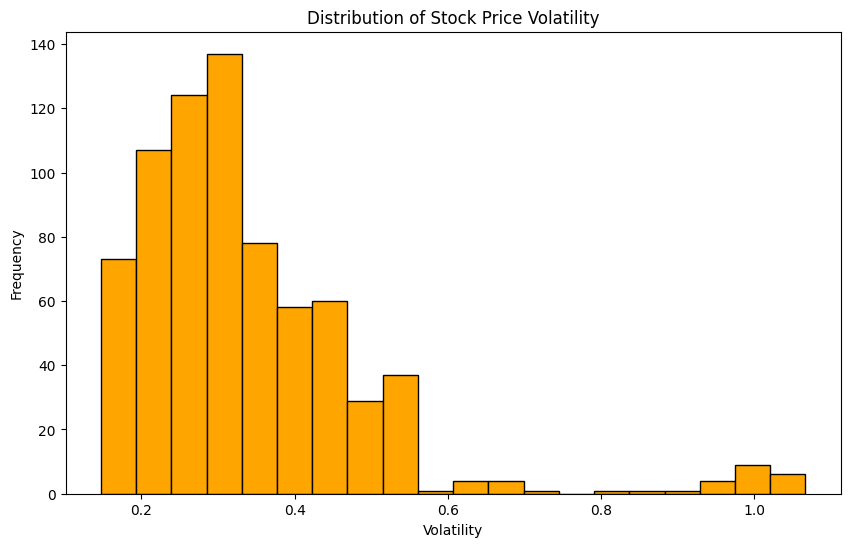

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Volatility'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Stock Price Volatility')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

The distribution shows a right-skewed distribution indicating that at most times, volatility tends to be low, with occasional spikes most likely due to significant market events.

### Publicly traded Bonds

The data below consists of public traded bonds. I have collected data of the Vanguard Long-Term Bond Index Fund ETF(BLV) and U.S. Treasury bond (10-Year)- TNX price data from Yahoo finance.

In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Downloading the Vanguard Long-Term Bond Index Fund ETF data
start = datetime.date.today() - datetime.timedelta(days=5*365)
end = datetime.date.today()
blv_data = yf.download(["BLV"], start, end)

# Downloading the U.S. Treasury bond (10-Year) data
treasury_bond = yf.download(["^TNX"], start, end)

# Merging the bond data
bond_data = pd.DataFrame({
    'Treasury_Yield': treasury_bond['Adj Close'],
    'BLV_bond': blv_data['Adj Close'].reindex(treasury_bond.index),
    'Volume': blv_data['Volume']
})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
blv_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,102.010002,102.720001,102.010002,102.669998,82.601913,400200
2019-10-01,101.610001,103.089996,101.550003,102.720001,82.868126,519200
2019-10-02,102.760002,103.029999,102.500000,102.800003,82.932671,383800
2019-10-03,103.019997,104.000000,102.970001,103.510002,83.505470,609200
2019-10-04,103.790001,104.180000,103.720001,104.099998,83.981422,322000


In [ ]:
treasury_bond.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,1.699,1.713,1.672,1.675,1.675,0
2019-10-01,1.727,1.755,1.613,1.644,1.644,0
2019-10-02,1.634,1.644,1.580,1.596,1.596,0
2019-10-03,1.584,1.596,1.510,1.536,1.536,0
2019-10-04,1.538,1.555,1.510,1.515,1.515,0


In [ ]:
bond_data.head()

,Treasury_Yield,BLV_bond,Volume
Date,,,
2019-09-30,1.675,82.601913,400200
2019-10-01,1.644,82.868126,519200
2019-10-02,1.596,82.932671,383800
2019-10-03,1.536,83.505470,609200
2019-10-04,1.515,83.981422,322000


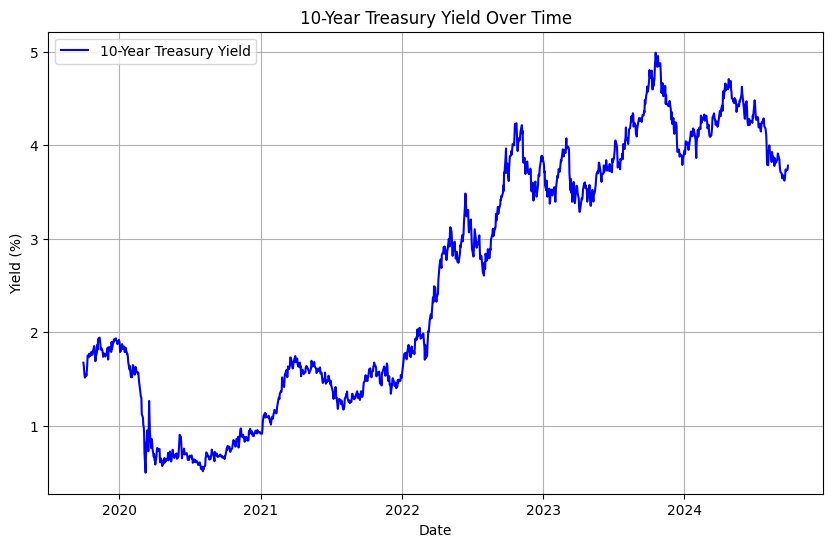

In [ ]:
# Plotting Treasury Yield
plt.figure(figsize=(10, 6))
plt.plot(bond_data.index, bond_data['Treasury_Yield'], label='10-Year Treasury Yield', color='blue')
plt.title('10-Year Treasury Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.legend()
plt.show()

The graph above indicates the price of the treasury yield over time. The price was very low in 2020 due to the COVID 19 pandemic

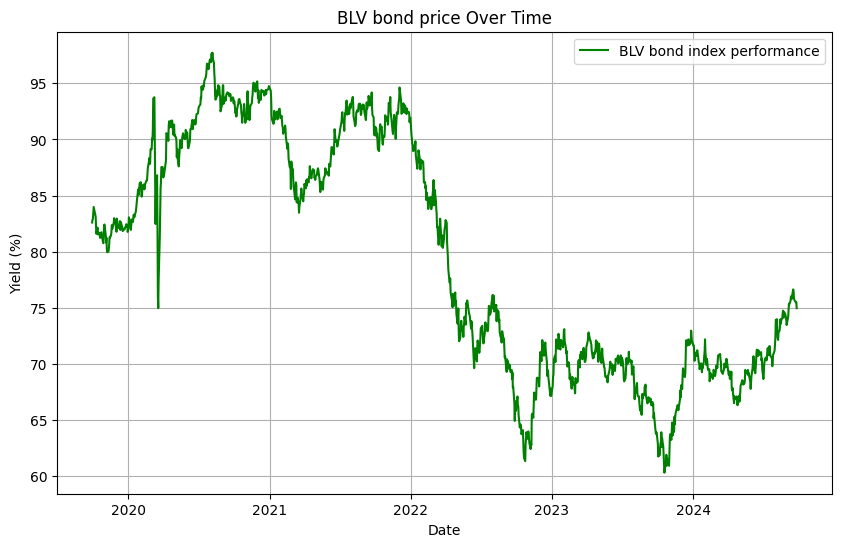

In [ ]:
# Plotting BLV Data
plt.figure(figsize=(10, 6))
plt.plot(bond_data.index, bond_data['BLV_bond'], label='BLV bond index performance', color='green')
plt.title('BLV bond price Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.legend()
plt.show()

The price of the BLV bond over the five years is very volatile. This could be because of market sentiments

In [ ]:
# Calculate Daily Returns for BLV Bond
bond_data['BLV_Daily_Return'] = bond_data['BLV_bond'].pct_change()

# Calculating 20-day rolling Volatility for BLV Bond (std of daily returns)
bond_data['BLV_Volatility'] = bond_data['BLV_Daily_Return'].rolling(window=20).std()

# Calculate the Average Volume for BLV Bond
average_volume = bond_data['Volume'].mean()
print(f"Average Trading Volume (BLV): {average_volume}")

# Drop missing values (from pct_change() and rolling calculations)
bond_data.dropna(inplace=True)


Average Trading Volume (BLV): 570319.2675159236


Text(0, 0.5, 'Daily Returns')

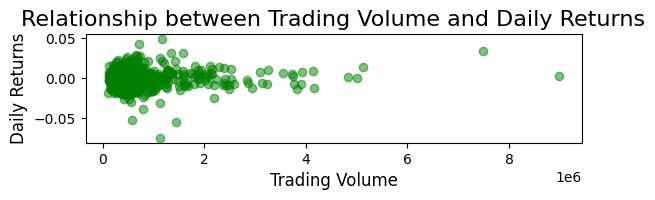

In [ ]:
# Plotting the Volume and Daily Returns relationship
plt.subplot(3, 1, 3)
plt.scatter(bond_data['Volume'], bond_data['BLV_Daily_Return'], color='green', alpha=0.5)
plt.title('Relationship between Trading Volume and Daily Returns', fontsize=16)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Daily Returns', fontsize=12)

The graph above shows the relationship between the BLV volume and daily returns

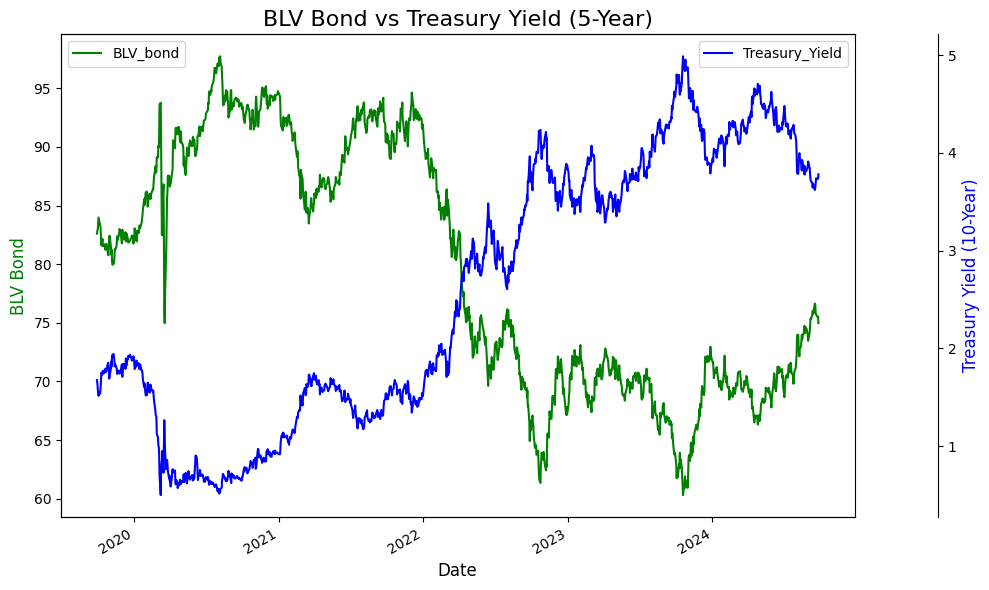

In [ ]:
# Plot only 'BLV_bond' and 'Treasury_Yield'
fig = plt.figure(figsize=(10, 6))

# Create the first axis for BLV Bond
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # Create the second y-axis for Treasury Yield

# Plot BLV Bond on ax1
bond_data.plot(ax=ax1, y="BLV_bond", legend=False, color="green")

# Plot Treasury Yield on ax2
bond_data.plot(ax=ax2, y="Treasury_Yield", legend=False, color="blue")

# Set axis labels
ax1.set_ylabel("BLV Bond", fontsize=12, color="green")
ax2.set_ylabel("Treasury Yield (10-Year)", fontsize=12, color="blue")
ax1.set_xlabel("Date", fontsize=12)

# Set title
plt.title("BLV Bond vs Treasury Yield (5-Year)", fontsize=16)

# Adjust the spine of ax2 to avoid overlapping
ax2.spines["right"].set_position(("outward", 60))

# Set position of legends
ax1.legend(["BLV_bond"], loc="upper left")
ax2.legend(["Treasury_Yield"], loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


start = datetime.date.today() - datetime.timedelta(days=5*365)
end = datetime.date.today()



### An illiquid security

In [ ]:
import yfinance as yf
import datetime

# Define the start and end dates
start_date = datetime.date.today() - datetime.timedelta(days=5*365)
end_date = datetime.date.today()

# Download the data for Amundi Impact Social Bonds BdF D (0P0001O1SK.F)
illiquid_bond = yf.download("0P0001O1SK.F", start=start_date, end=end_date)["Adj Close"]

illiquid_bond.describe()

[*********************100%***********************]  1 of 1 completed


,Adj Close
count,709.000000
mean,91.658558
std,2.913450
min,87.460350
25%,88.938744
50%,91.738884
75%,93.480003
max,98.239914


In [ ]:
bond_data = yf.download('0P0001O1SK.F', start='2020-01-01', end='2023-01-01')

# Calculate daily returns (percentage change in adjusted closing price)
bond_data['Daily Returns'] = bond_data['Adj Close'].pct_change()
bond_data.dropna(inplace=True)

# Calculate annualized volatility using a 21-day rolling window
bond_data['Volatility'] = bond_data['Daily Returns'].rolling(window=21).std() * np.sqrt(252)

illiquidvolatility_df = pd.DataFrame(bond_data['Volatility'], columns=['Volatility'])

illiquidvolatility_df.describe()

[*********************100%***********************]  1 of 1 completed


,Volatility
count,255.000000
mean,0.028362
std,0.010705
min,0.007415
25%,0.021689
50%,0.027647
75%,0.037150
max,0.054622


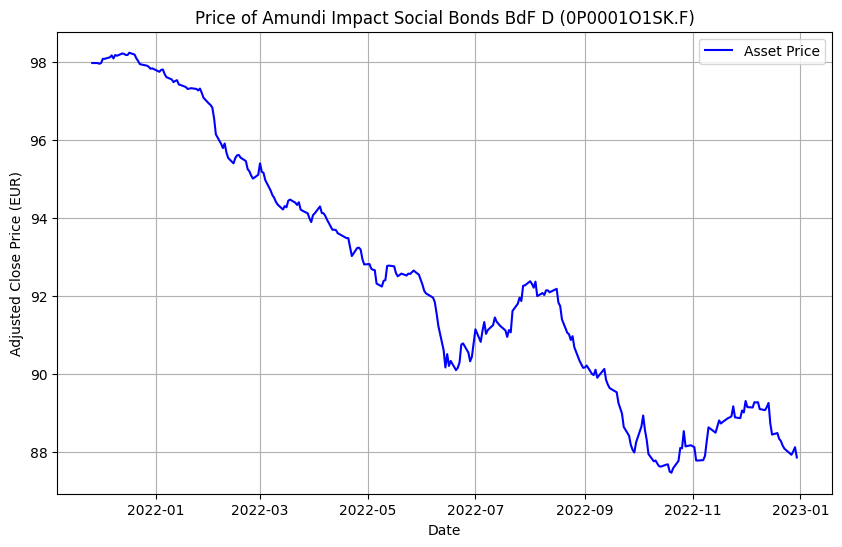

In [ ]:
# Visualising Price of the asset
plt.figure(figsize=(10, 6))
plt.plot(bond_data.index, bond_data['Adj Close'], label='Asset Price', color='blue')
plt.title('Price of Amundi Impact Social Bonds BdF D (0P0001O1SK.F)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (EUR)')
plt.legend()
plt.grid(True)
plt.show()

This plot shows how the price of the illiquid bond has fluctuated over time, helping visualize long-term trends in value.

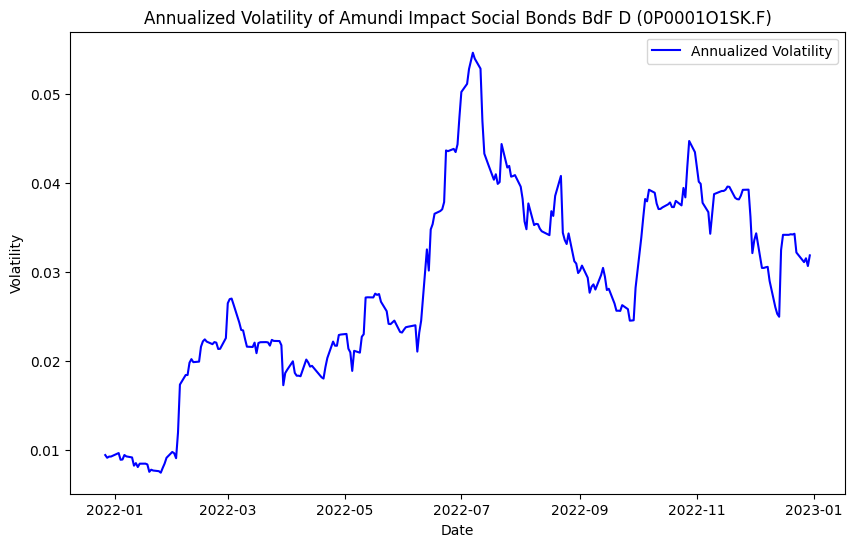

In [ ]:
# Plotting the volatility
plt.figure(figsize=(10, 6))
plt.plot(illiquidvolatility_df.index, illiquidvolatility_df['Volatility'], label='Annualized Volatility', color='blue')
plt.title('Annualized Volatility of Amundi Impact Social Bonds BdF D (0P0001O1SK.F)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

The annualised volatility for the illiquid bond shows a high volatility due to higher price fluctuations

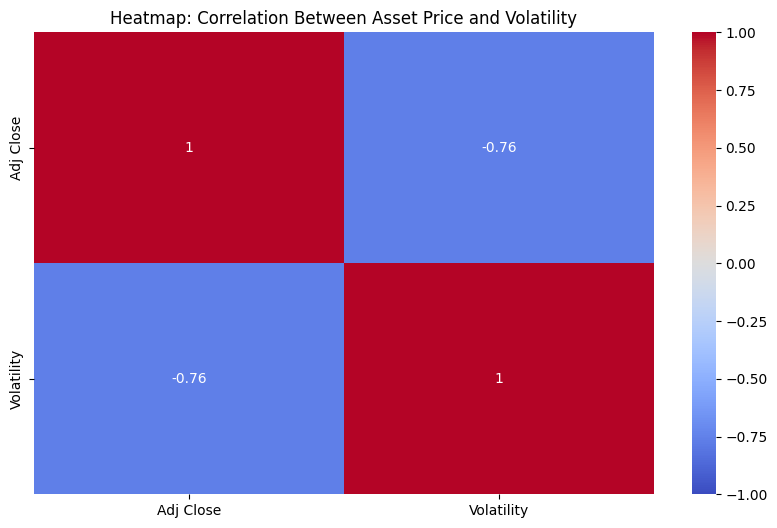

In [ ]:
# Heatmap Showing Correlation Between Price and Volatility
plt.figure(figsize=(10, 6))
sns.heatmap(bond_data[['Adj Close', 'Volatility']].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap: Correlation Between Asset Price and Volatility')
plt.show()

The heatmap visualizes the correlation between the asset price and volatility